In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
%matplotlib inline

In [59]:
##link for dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud
data = pd.read_csv("creditcard.csv")
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [61]:
cat_var = [col for col in data.columns if data[col].dtype =='O']
cat_var

[]

In [64]:
#imbalanced dataset
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, '0: No Fraud | 1: Fraud')

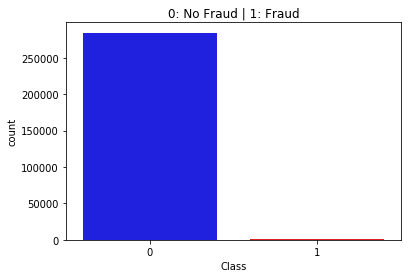

In [69]:
#ploting the traget variable
colors = ["blue", "red"]

sns.countplot('Class', data=data, palette=colors)
plt.title('0: No Fraud | 1: Fraud')

In [68]:
#percentage of fraud application to non fraud applications
(data.Class.value_counts()/len(data))*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [26]:
#balancing the data
fraud =data[data['Class']==1]
not_fraud=data[data['Class']==0][:492]

In [27]:
#concating faud and non fraud applications
df =pd.concat([fraud, not_fraud])


In [28]:
df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

Text(0.5, 1.0, 'number of fraud |non fraud applicants')

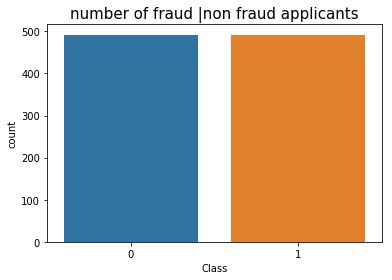

In [73]:
sns.countplot('Class', data = df)
plt.title('number of fraud | non fraud applicants', fontsize =15)


In [33]:
#standardization of 'Time' and 'Amount' features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Time'] = sc.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = sc.transform(df['Amount'].values.reshape(-1,1))

In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-0.761762,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.769483,1
623,-0.760507,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,-0.759423,1
4920,-0.684624,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,-0.764920,1
6108,-0.636622,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.768361,1
6329,-0.626486,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.769464,1


In [35]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9.840000e+02,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,2.591649e-16,-2.467403,1.905304,-3.083884,2.456780,-1.561726,-0.572584,-2.730903,0.261082,-1.301145,-2.805194,1.952535,-2.995317,-0.090291,-3.597227,0.062751,-2.157125,-3.366095,-1.218706,0.335945,0.211179,0.354898,-0.044481,-0.036529,-0.047380,0.087571,0.026120,0.096182,0.027865,-0.767653,0.500000
std,1.000509e+00,5.407122,3.596109,6.435905,3.042722,4.202692,1.803657,5.863242,4.850081,2.266780,4.549493,2.736980,4.657383,1.010213,4.568241,1.002187,3.424393,5.953541,2.358768,1.284338,1.061353,2.787267,1.145080,1.148960,0.586683,0.640419,0.468299,1.003732,0.442955,0.004567,0.500254
min,-7.694834e-01,-30.552380,-12.114213,-31.103685,-4.515824,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-2.332011,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.243924,-7.263482,-2.733887,-0.769483,0.000000
25%,-7.663074e-01,-2.788129,0.085200,-5.084967,0.345951,-1.692661,-1.442584,-3.060742,-0.170996,-2.222204,-4.572043,-0.188237,-5.495221,-0.786301,-6.721799,-0.510123,-3.543426,-5.317584,-1.853739,-0.488002,-0.166192,-0.173785,-0.533915,-0.226458,-0.415078,-0.216776,-0.296613,-0.039310,-0.049952,-0.769449,0.000000
50%,-7.621995e-01,-0.781327,0.954502,-0.309446,1.383210,-0.390293,-0.510317,-0.433163,0.153493,-0.584912,-0.594065,1.199952,-0.514868,-0.047583,-1.041415,0.148834,-0.728592,-0.510419,-0.479214,0.224047,0.052782,0.093024,-0.028825,-0.050720,0.027849,0.127459,-0.015632,0.065185,0.037457,-0.769181,0.500000
75%,6.675738e-01,0.870308,2.726800,0.934280,4.175332,0.427009,0.233236,0.304743,0.808184,0.114193,-0.000161,3.586130,0.326755,0.652979,-0.040879,0.786409,0.189180,0.187781,0.190446,1.002454,0.414730,0.713646,0.440345,0.142884,0.393393,0.456121,0.308815,0.455031,0.217936,-0.767710,1.000000
max,2.470227e+00,2.132386,22.057729,3.772857,12.114672,11.095089,6.474115,5.802537,20.007208,5.436633,8.737458,12.018913,2.152055,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.215279,2.208209,3.065576,3.052358,1.779364,-0.696681,1.000000


In [37]:
#spliting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis =1), df.Class, test_size =0.2, random_state =0)
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [39]:
#feature reductions with Principal Component Analysis and Truncated Singular Value Decomposition (SVD)

from sklearn.decomposition import PCA,TruncatedSVD
pca =PCA(n_components=2)
X_train_pca= pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [40]:
pca.explained_variance_ratio_
#the first two elements accounts for 77.5% of total varainace

array([0.69458426, 0.08149434])

In [42]:
from sklearn.metrics import roc_auc_score
#implementing logistic regression
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train_pca, y_train)

pred = logit_model.predict_proba(X_train_pca)

print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = logit_model.predict_proba(X_test_pca)

print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Logit train roc-auc: 0.9761606346827232
Logit test roc-auc: 0.9816504250466515


C:\Users\B\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
import xgboost as xgb
#implementing xgboost 
xgb_model = xgb.XGBClassifier(n_estimators=100, min_child_weight=12, reg_alpha=4)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_pca, y_train)

pred = xgb_model.predict_proba(X_train_pca)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = xgb_model.predict_proba(X_test_pca)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

xgb train roc-auc: 0.9960719961753647
xgb test roc-auc: 0.987455940286129


In [47]:
#implementing Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_pca, y_train)

pred = ada_model.predict_proba(X_train_pca)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test_pca)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Adaboost train roc-auc: 0.9974771620172367
Adaboost test roc-auc: 0.9916027368857557


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure(figsize=(6, 5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

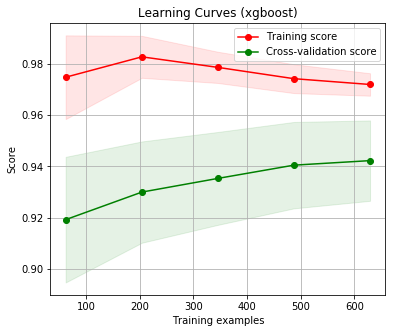

In [49]:
title = "Learning Curves (xgboost)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = xgb_model
plot_learning_curve(estimator, title, X_train_pca, y_train, cv=cv, n_jobs=4)
plt.show()

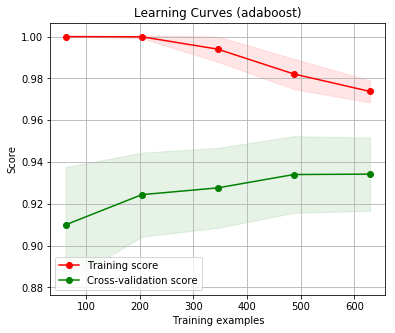

In [50]:
title = "Learning Curves (adaboost)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = ada_model
plot_learning_curve(estimator, title, X_train_pca, y_train, cv=cv, n_jobs=4)
plt.show()